# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

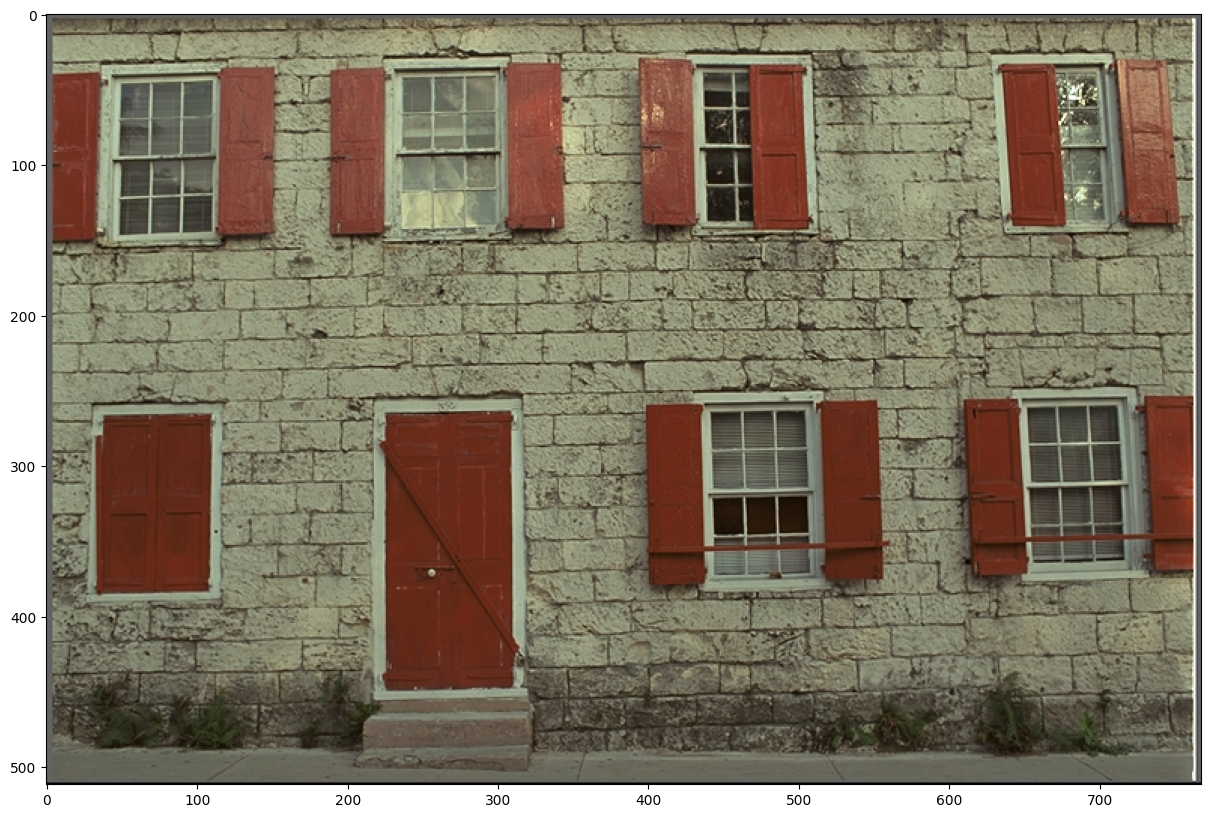

In [3]:
img = cv2.imread('../data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

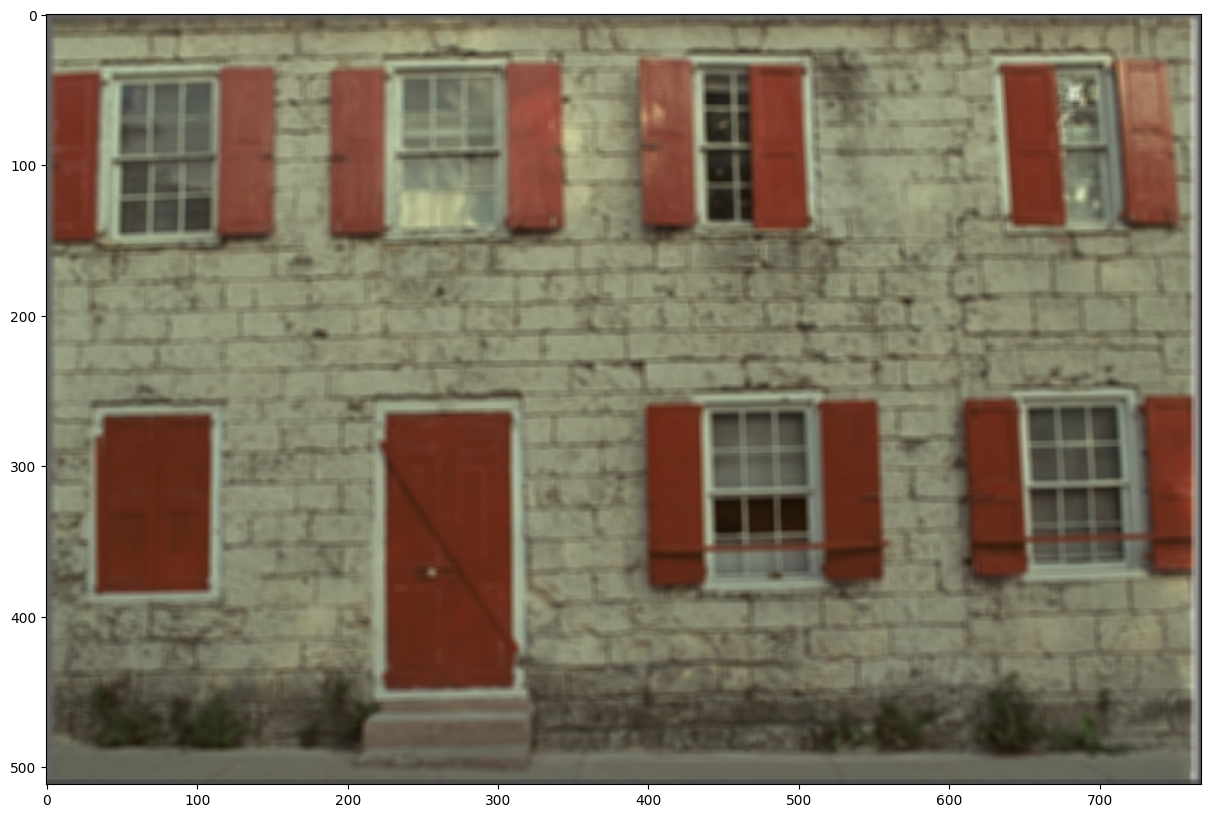

In [4]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=10)
unsharp = unsharp.astype(np.float32) / 255
plt.imshow(unsharp)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


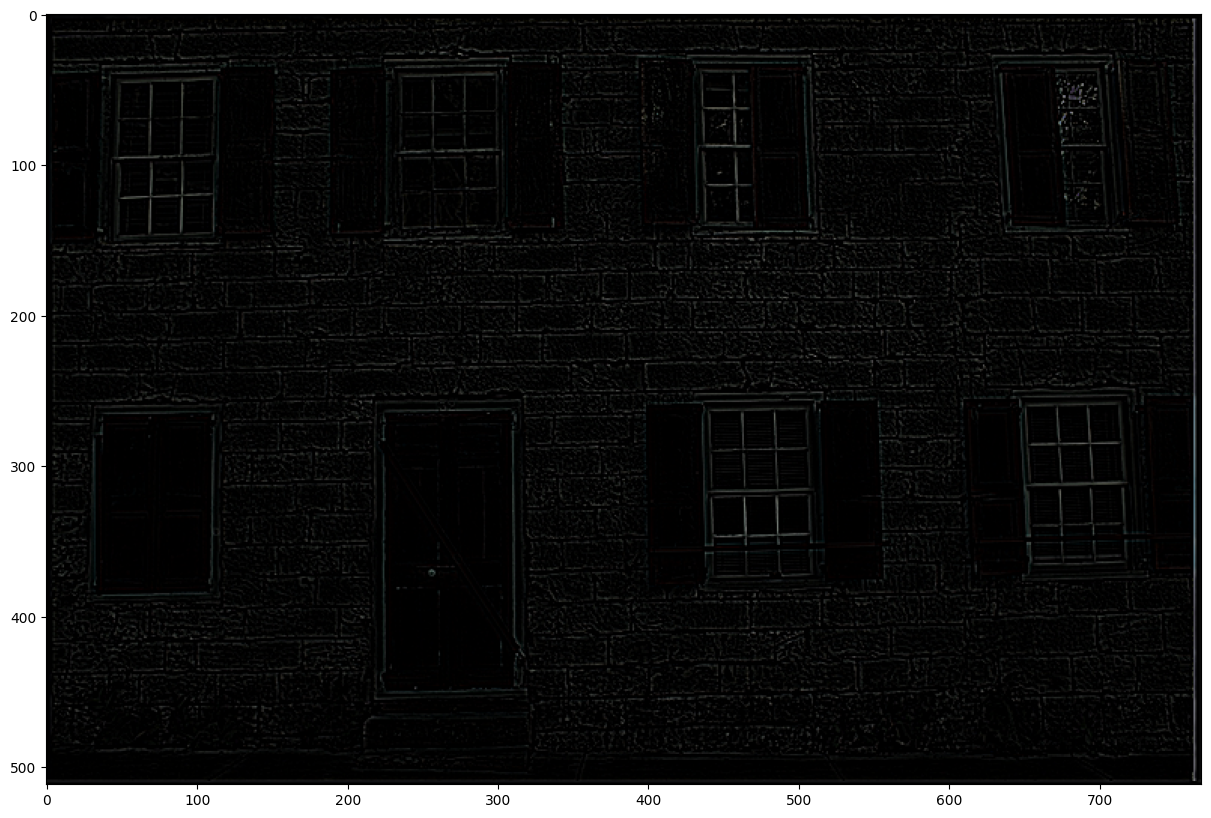

In [13]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
original = img.astype(np.float32) / 255
diff = original - unsharp

plt.imshow(diff)

In [17]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = original + (original - unsharp) * 4

sharpened[sharpened > 1] = 1
sharpened[sharpened < 0] = 0

plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(sharpened), plt.title('Sharpened')

(<AxesSubplot: title={'center': 'Sharpened'}>,
 Text(0.5, 1.0, 'Sharpened'))

### Questions
* What is a good (reasonable) value for the `amount` parameter? - depends on the image & application, I believe that in current case 4 is decent value for "amount"
 * What happens if it is too small? - image is not sharp enough
 * What happens if it is too large? - image is too noisy